#Question 1:  What is Logistic Regression, and how does it differ from Linear Regression?

##Answer:

Logistic Regression is a statistical model used for classification tasks (e.g., predicting whether an email is spam or not). Instead of predicting continuous values like Linear Regression, Logistic Regression predicts the probability of an outcome belonging to a class (usually binary: 0 or 1).

*   Linear Regression → predicts continuous values (e.g., house price).

*   Logistic Regression → applies the sigmoid function to map values into a
probability between 0 and 1, and then classifies based on a threshold (commonly 0.5).

#Question 2: Explain the role of the Sigmoid function in Logistic Regression.

Answer:
The Sigmoid function is defined as:



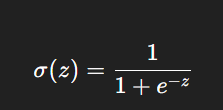
It maps any real number to the range (0, 1).

In Logistic Regression, it converts the linear combination of inputs (weights and features) into a probability score.

Helps in classification because probabilities can be thresholded to assign class labels (e.g., >0.5 = class 1, otherwise class 0).

#Question 3: What is Regularization in Logistic Regression and why is it needed?

Answer:
Regularization is a technique used to prevent overfitting by penalizing large coefficients in the model.

*   L1 Regularization (Lasso): adds penalty proportional to absolute value of
coefficients → can shrink some coefficients to zero (feature selection).

*   L2 Regularization (Ridge): adds penalty proportional to squared value of coefficients → discourages large weights, spreads importance across features.

Why needed?

*   Prevents overfitting.

*   Improves generalization to unseen data.

*   Handles high-dimensional datasets better.

#Question 4: What are some common evaluation metrics for classification models, and why are they important?

Answer:

*   Accuracy: % of correct predictions. Simple but misleading on imbalanced datasets.

*   Precision: Out of predicted positives, how many are actual positives.

*   Recall (Sensitivity): Out of actual positives, how many were correctly predicted.

*   F1-Score: Harmonic mean of Precision and Recall. Useful when dataset is imbalanced.

*   ROC-AUC: Measures ability of model to distinguish between classes across thresholds.

*   These metrics ensure we evaluate models beyond just accuracy, especially for imbalanced datasets.

#Question 5: Write a Python program that loads a CSV file into a Pandas DataFrame, splits into train/test sets, trains a Logistic Regression model, and prints its accuracy.
(Use Dataset from sklearn package)
(Include your Python code and output in the code box below.)

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Predict & Accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.956140350877193


# Question 6:  Write a Python program to train a Logistic Regression model using L2 regularization (Ridge) and print the model coefficients and accuracy.
(Use Dataset from sklearn package)
(Include your Python code and output in the code box below.)

In [2]:
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Accuracy:", model.score(X_test, y_test))


Model Coefficients: [[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]
Accuracy: 0.956140350877193


#Question 7: Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr' and print the classification report. (Use Dataset from sklearn package) (Include your Python code and output in the code box below.)

In [3]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

# Load multiclass dataset
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression (One-vs-Rest)
model = LogisticRegression(multi_class='ovr', max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


#Question 8: Write a Python program to apply GridSearchCV to tune C and penalty hyperparameters for Logistic Regression and print the best parameters and validation accuracy. (Use Dataset from sklearn package) (Include your Python code and output in the code box below.)

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # supports both l1 & l2
}

grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Validation Accuracy:", grid.best_score_)


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Validation Accuracy: 0.9583333333333334


#Question 9: Write a Python program to standardize the features before training Logistic Regression and compare the model's accuracy with and without scaling. (Use Dataset from sklearn package) (Include your Python code and output in the code box below.)

In [5]:
from sklearn.preprocessing import StandardScaler

# Without scaling
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
print("Accuracy without scaling:", model.score(X_test, y_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=5000)
model_scaled.fit(X_train_scaled, y_train)
print("Accuracy with scaling:", model_scaled.score(X_test_scaled, y_test))


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


#Question 10: Imagine you are working at an e-commerce company that wants to predict which customers will respond to a marketing campaign. Given an imbalanced dataset (only 5% of customers respond), describe the approach you’d take to build a Logistic Regression model — including data handling, feature scaling, balancing classes, hyperparameter tuning, and evaluating the model for this real-world business use case.


Answer:

For predicting customer response (only 5% positive response):

###1.  Data Handling & Feature Engineering

*  Clean missing values, encode categorical variables, normalize skewed features.

*  Derive useful features (e.g., past purchases, browsing behavior, demographics).

###2.  Feature Scaling

*  Standardize features (important for Logistic Regression).

###3.  Balancing Classes

* Since only 5% respond → dataset is highly imbalanced.

*  Use SMOTE (oversampling), undersampling, or class_weight='balanced' in Logistic Regression.

###4.  Model Training & Hyperparameter Tuning

*  Use Logistic Regression with L1/L2 regularization.

*  Tune C (regularization strength) using GridSearchCV or RandomizedSearchCV.

###5.  Evaluation Metrics

*  Accuracy is misleading.

*  Use Precision, Recall, F1-score, ROC-AUC, PR-AUC (important for imbalanced problems).

*  Business may prefer high Recall (catch more responders) or high Precision (reduce marketing cost).

###6.  Deployment Strategy

*  Continuously monitor model drift.

*  Re-train with new data.